In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Files/HackerEarth Insurance/train.csv" , parse_dates = ["Expiry_date"])
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [ ]:
tt = pd.read_csv("/content/drive/MyDrive/Data Files/HackerEarth Insurance/test.csv" , parse_dates = ["Expiry_date"])
tt.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0


In [ ]:
cn = df[["Image_path" , "Condition"]]
cn.head()

,Image_path,Condition
0,img_4513976.jpg,0
1,img_7764995.jpg,1
2,img_451308.jpg,0
3,img_7768372.jpg,1
4,img_7765274.jpg,1


In [ ]:
ttcn = tt[["Image_path"]]
ttcn.head()

,Image_path
0,img_4538519.jpg
1,img_7766002.jpg
2,img_4637390.jpg
3,img_4516108.jpg
4,img_4517008.jpg


In [ ]:
cn.head()

,Image_path,Condition
0,img_4513976.jpg,0
1,img_7764995.jpg,1
2,img_451308.jpg,0
3,img_7768372.jpg,1
4,img_7765274.jpg,1


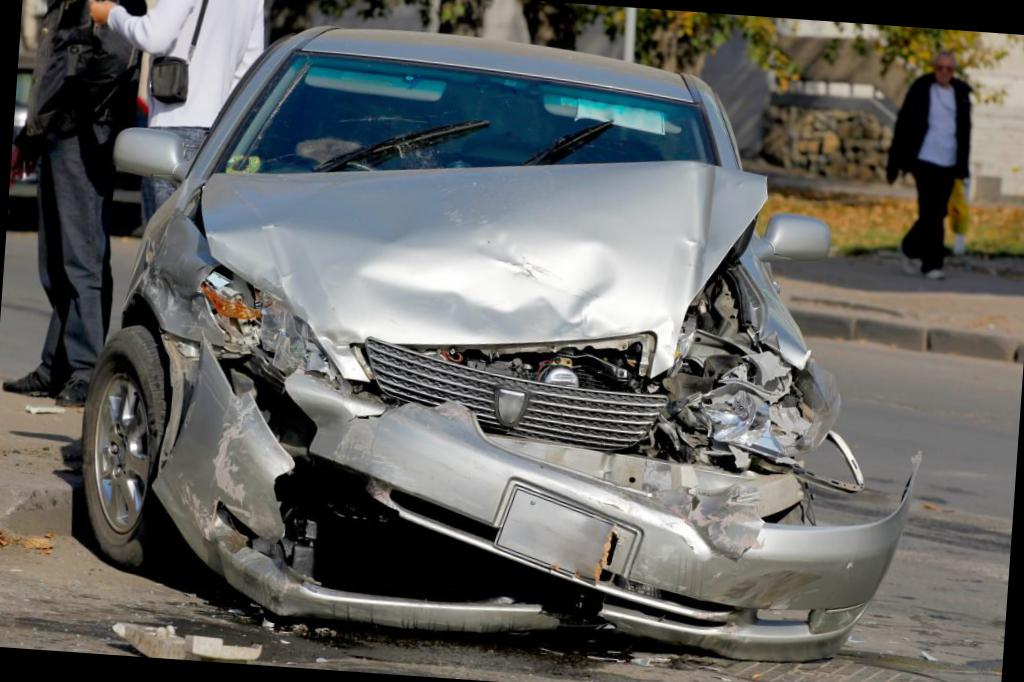

In [ ]:
from IPython.display import display, Image
Image("/content/drive/MyDrive/Data Files/HackerEarth Insurance/trainImages/img_7768372.jpg")

In [ ]:
filenames = ["/content/drive/MyDrive/Data Files/HackerEarth Insurance/trainImages/" + fname for fname in cn["Image_path"]]
filenames[:5]

['/content/drive/MyDrive/Data Files/HackerEarth Insurance/trainImages/img_4513976.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/trainImages/img_7764995.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/trainImages/img_451308.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/trainImages/img_7768372.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/trainImages/img_7765274.jpg']

In [ ]:
testfiles = ["/content/drive/MyDrive/Data Files/HackerEarth Insurance/testImages/" + fname for fname in ttcn["Image_path"]]
testfiles[:5]

['/content/drive/MyDrive/Data Files/HackerEarth Insurance/testImages/img_4538519.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/testImages/img_7766002.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/testImages/img_4637390.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/testImages/img_4516108.jpg',
 '/content/drive/MyDrive/Data Files/HackerEarth Insurance/testImages/img_4517008.jpg']

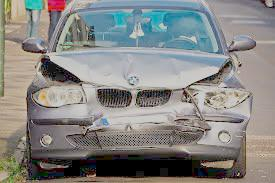

In [ ]:
Image(filenames[1398])

In [ ]:
cn["Condition"].value_counts()

1    1300
0      99
Name: Condition, dtype: int64

In [ ]:
labels = cn["Condition"].to_numpy()
labels[:5]

array([0, 1, 0, 1, 1])

In [ ]:
X = filenames
y = labels

In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(683, 1024, 3)

In [ ]:
image1 = imread(filenames[0])
image1

array([[[ 17,  18,  10],
        [ 38,  39,  31],
        [ 53,  54,  48],
        ...,
        [141, 132, 133],
        [144, 135, 136],
        [140, 131, 132]],

       [[  0,   1,   0],
        [ 19,  20,  12],
        [ 19,  20,  14],
        ...,
        [137, 129, 127],
        [138, 130, 128],
        [135, 127, 125]],

       [[  1,   2,   0],
        [ 23,  24,  16],
        [ 22,  23,  17],
        ...,
        [137, 129, 127],
        [131, 123, 121],
        [124, 116, 114]],

       ...,

       [[183, 180, 187],
        [173, 170, 177],
        [174, 171, 178],
        ...,
        [177, 179, 178],
        [179, 181, 180],
        [177, 179, 178]],

       [[179, 171, 169],
        [179, 174, 171],
        [167, 162, 159],
        ...,
        [169, 171, 166],
        [171, 173, 168],
        [170, 172, 167]],

       [[170, 162, 160],
        [172, 167, 164],
        [164, 159, 156],
        ...,
        [169, 171, 166],
        [171, 173, 168],
        [170, 172, 167]]

(-0.5, 629.5, 417.5, -0.5)

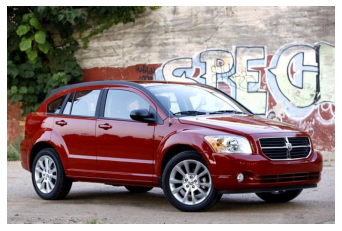

In [ ]:
plt.imshow(image1)
plt.axis("off")

In [ ]:
image2 = tf.io.read_file(filenames[0])
image2 = tf.image.decode_jpeg(image2, channels=3)
image2

<tf.Tensor: shape=(418, 630, 3), dtype=uint8, numpy=
array([[[ 16,  17,   9],
        [ 37,  38,  30],
        [ 52,  53,  47],
        ...,
        [141, 133, 131],
        [143, 135, 133],
        [139, 131, 129]],

       [[  0,   1,   0],
        [ 18,  19,  11],
        [ 18,  19,  13],
        ...,
        [137, 129, 127],
        [138, 130, 128],
        [135, 127, 125]],

       [[  0,   1,   0],
        [ 23,  24,  16],
        [ 22,  23,  17],
        ...,
        [137, 129, 126],
        [131, 123, 120],
        [123, 115, 112]],

       ...,

       [[185, 180, 184],
        [172, 170, 173],
        [173, 171, 174],
        ...,
        [177, 179, 176],
        [178, 180, 177],
        [177, 179, 176]],

       [[176, 170, 170],
        [177, 173, 172],
        [165, 161, 160],
        ...,
        [167, 172, 166],
        [168, 173, 167],
        [167, 172, 166]],

       [[168, 163, 160],
        [172, 167, 164],
        [162, 158, 155],
        ...,
        [167, 172, 16

(-0.5, 629.5, 417.5, -0.5)

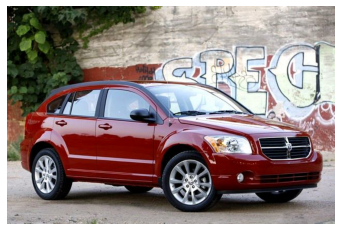

In [ ]:
plt.imshow(image2)
plt.axis("off")

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

In [ ]:
def process(image_path):
  img = imread(image_path)
  img = tf. convert_to_tensor(img)
  img = img / 255
  img = tf.image.resize(img, size=[224 , 224])
  return img

In [ ]:
X = np.array(list(map(process , X)))

In [ ]:
testfiles = np.array(list(map(process , testfiles)))

In [ ]:
X.shape

(1399, 224, 224, 3)

In [ ]:
testfiles.shape

(600, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)

(1119, 1119, 280, 280)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

In [ ]:
from keras import backend as K

def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(optimizer = "adam", loss='binary_crossentropy', metrics=[f1_m])
  return model

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = modified_model()

In [ ]:
tf.random.set_seed(42)
# h = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32) , epochs=10 , shuffle = 1)
h = model.fit(X_train , y_train , epochs = 15 , validation_split = 0.1 , batch_size = 32  ,shuffle = True)

Epoch 1/11
32/32 [==============================] - 7s 184ms/step - loss: 0.6658 - f1_m: 0.8925 - val_loss: 0.2691 - val_f1_m: 0.9757
Epoch 2/11
32/32 [==============================] - 6s 178ms/step - loss: 0.2788 - f1_m: 0.9634 - val_loss: 0.1857 - val_f1_m: 0.9757
Epoch 3/11
32/32 [==============================] - 6s 178ms/step - loss: 0.2543 - f1_m: 0.9666 - val_loss: 0.2721 - val_f1_m: 0.9757
Epoch 4/11
32/32 [==============================] - 6s 178ms/step - loss: 0.3563 - f1_m: 0.9569 - val_loss: 0.1931 - val_f1_m: 0.9757
Epoch 5/11
32/32 [==============================] - 6s 177ms/step - loss: 0.2720 - f1_m: 0.9604 - val_loss: 0.2027 - val_f1_m: 0.9757
Epoch 6/11
32/32 [==============================] - 6s 178ms/step - loss: 0.2551 - f1_m: 0.9628 - val_loss: 0.1924 - val_f1_m: 0.9757
Epoch 7/11
32/32 [==============================] - 6s 178ms/step - loss: 0.2670 - f1_m: 0.9621 - val_loss: 0.1782 - val_f1_m: 0.9757
Epoch 8/11
32/32 [==============================] - 6s 178ms/s

Text(0.5, 0, 'epoch')

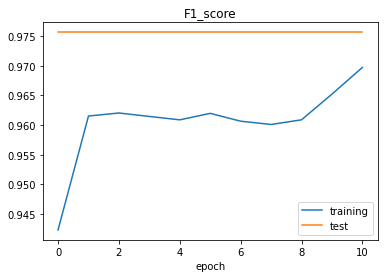

In [ ]:
plt.plot(h.history['f1_m'])
plt.plot(h.history['val_f1_m'])
plt.legend(['training','test'])
plt.title('F1_score')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

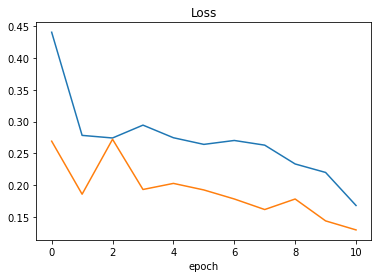

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
cnn_preds = model.predict(X_test)
cnn_preds = tf.round(cnn_preds)
cnn_preds = cnn_preds.numpy()
cnn_preds = cnn_preds.flatten().astype(int)
cnn_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
cr = classification_report(y_test , cnn_preds)
cm = confusion_matrix(y_test , cnn_preds)

In [ ]:
print(cm)

[[  3  17]
 [  2 258]]


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.15      0.24        20
           1       0.94      0.99      0.96       260

    accuracy                           0.93       280
   macro avg       0.77      0.57      0.60       280
weighted avg       0.91      0.93      0.91       280



In [ ]:
from sklearn import metrics
score1 = max(0 , 100 * metrics.f1_score(y_test , cnn_preds , average = "micro"))
score1

93.21428571428572

In [ ]:
condition_preds = model.predict(testfiles)
condition_preds = tf.round(condition_preds)
condition_preds = condition_preds.numpy()
condition_preds = condition_preds.flatten().astype(int)
condition_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
df.drop(["Image_path"] , axis = 1 , inplace = True)

In [ ]:
tt.drop(["Image_path"] , axis = 1 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Insurance_company  1399 non-null   object        
 1   Cost_of_vehicle    1310 non-null   float64       
 2   Min_coverage       1310 non-null   float64       
 3   Expiry_date        1399 non-null   datetime64[ns]
 4   Max_coverage       1310 non-null   float64       
 5   Condition          1399 non-null   int64         
 6   Amount             1388 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 76.6+ KB


In [ ]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Insurance_company  600 non-null    object        
 1   Cost_of_vehicle    600 non-null    int64         
 2   Min_coverage       600 non-null    float64       
 3   Expiry_date        600 non-null    datetime64[ns]
 4   Max_coverage       600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 23.6+ KB


In [ ]:
df.isna().sum()

Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [ ]:
tt.isna().sum()

Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
dtype: int64

In [ ]:
cats = df.select_dtypes(include = ["object"]).columns
cats

Index(['Insurance_company'], dtype='object')

In [ ]:
ints = df.select_dtypes(exclude = ["object"]).columns
ints

Index(['Cost_of_vehicle', 'Min_coverage', 'Expiry_date', 'Max_coverage',
       'Condition', 'Amount'],
      dtype='object')

In [ ]:
for i in cats:
  print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
  print("\n")
  print(f"The unique values in {i} column is/are {df[i].unique()}")
  print("\n")
  print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
  print("\n\n")
  print("*"*100)
  print("\n\n")

The number of unique values in Insurance_company column is/are 11


The unique values in Insurance_company column is/are ['BQ' 'A' 'AC' 'BC' 'DA' 'BB' 'C' 'O' 'B' 'AA' 'RE']


The value counts for each value in Insurance_company column is/are :  
B     148
A     132
C     131
BQ    131
DA    128
O     126
BB    124
AA    123
BC    121
AC    119
RE    116
Name: Insurance_company, dtype: int64



****************************************************************************************************





In [ ]:
df["year"] = df["Expiry_date"].dt.year
df["month"] = df["Expiry_date"].dt.month
df["date"] = df["Expiry_date"].dt.day

In [ ]:
tt["year"] = tt["Expiry_date"].dt.year
tt["month"] = tt["Expiry_date"].dt.month
tt["date"] = tt["Expiry_date"].dt.day

In [ ]:
df.drop(["Expiry_date"] , axis = 1 , inplace = True)
df.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,year,month,date
0,BQ,41500.0,1037.5,36142.68,0,0.0,2026,12,3
1,BQ,50700.0,1267.5,12753.00,1,6194.0,2025,7,10
2,A,49500.0,1237.5,43102.68,0,0.0,2022,8,11
3,A,33500.0,837.5,8453.00,1,7699.0,2022,8,2
4,AC,27600.0,690.0,6978.00,1,8849.0,2026,5,1


In [ ]:
tt.drop(["Expiry_date"] , axis = 1 , inplace = True)
tt.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,year,month,date
0,B,23600,590.0,5978.0,2025,4,12
1,C,28300,707.5,7153.0,2028,8,24
2,AC,43700,1092.5,11003.0,2023,11,28
3,BB,46100,1152.5,11603.0,2028,2,4
4,BB,40700,1017.5,10253.0,2022,1,3


In [ ]:
df["year"].value_counts()

2022    210
2028    209
2023    196
2027    195
2026    195
2024    188
2025    170
2021     36
Name: year, dtype: int64

In [ ]:
df.isna().sum()

Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Max_coverage         89
Condition             0
Amount               11
year                  0
month                 0
date                  0
dtype: int64

In [ ]:
df.dropna(axis=0 , subset = ["Amount"] , inplace = True)

In [ ]:
df.isna().sum()

Insurance_company     0
Cost_of_vehicle      87
Min_coverage         87
Max_coverage         87
Condition             0
Amount                0
year                  0
month                 0
date                  0
dtype: int64

In [ ]:
ints = df.select_dtypes(exclude = ["object"]).columns
ints

Index(['Cost_of_vehicle', 'Min_coverage', 'Max_coverage', 'Condition',
       'Amount', 'year', 'month', 'date'],
      dtype='object')

In [ ]:
for i in ints:
  df[i].fillna(df[i].median() , inplace = True)

In [ ]:
df["mean_coverage"] = df["Min_coverage"] + df["Max_coverage"]
df.drop(["Min_coverage" , "Max_coverage"] , axis = 1 , inplace = True)

In [ ]:
tt["mean_coverage"] = tt["Min_coverage"] + tt["Max_coverage"]
tt.drop(["Min_coverage" , "Max_coverage"] , axis = 1 , inplace = True)

In [ ]:
df.isna().sum()

Insurance_company    0
Cost_of_vehicle      0
Condition            0
Amount               0
year                 0
month                0
date                 0
mean_coverage        0
dtype: int64

In [ ]:
df = pd.get_dummies(df , columns = ["Insurance_company" , "month"] , prefix = ["Insurance_company" , "month"])
df.head()

,Cost_of_vehicle,Condition,Amount,year,date,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,41500.0,0,0.0,2026,3,37180.18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,50700.0,1,6194.0,2025,10,14020.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,49500.0,0,0.0,2022,11,44340.18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,33500.0,1,7699.0,2022,2,9290.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,27600.0,1,8849.0,2026,1,7668.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
tt = pd.get_dummies(tt , columns = ["Insurance_company" , "month"] , prefix = ["Insurance_company" , "month"])
tt.head()

,Cost_of_vehicle,year,date,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,23600,2025,12,6568.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,28300,2028,24,7860.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,43700,2023,28,12095.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,46100,2028,4,12755.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,40700,2022,3,11270.5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(["Insurance_company_RE" , "month_1"] , axis = 1 , inplace = True)

In [ ]:
tt.drop(["Insurance_company_RE" , "month_1"] , axis = 1 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1397
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cost_of_vehicle       1388 non-null   float64
 1   Condition             1388 non-null   int64  
 2   Amount                1388 non-null   float64
 3   year                  1388 non-null   int64  
 4   date                  1388 non-null   int64  
 5   mean_coverage         1388 non-null   float64
 6   Insurance_company_A   1388 non-null   uint8  
 7   Insurance_company_AA  1388 non-null   uint8  
 8   Insurance_company_AC  1388 non-null   uint8  
 9   Insurance_company_B   1388 non-null   uint8  
 10  Insurance_company_BB  1388 non-null   uint8  
 11  Insurance_company_BC  1388 non-null   uint8  
 12  Insurance_company_BQ  1388 non-null   uint8  
 13  Insurance_company_C   1388 non-null   uint8  
 14  Insurance_company_DA  1388 non-null   uint8  
 15  Insurance_company_O  

In [ ]:
 X = df.drop(["Amount"] , axis = 1)
 y = df["Amount"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ["Cost_of_vehicle" , "year" , "date"]
scaler.fit(X_train[cols])
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
tt["Condition"] = condition_preds
tt[cols] = scaler.transform(tt[cols])
tt.head()

,Cost_of_vehicle,year,date,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Condition
0,-1.620279,0.047927,-0.424326,6568.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,-1.072547,1.450905,0.983644,7860.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.722148,-0.887392,1.452967,12095.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1.001840,1.450905,-1.362973,12755.5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0.372532,-1.355051,-1.480304,11270.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train.head()

,Cost_of_vehicle,Condition,year,date,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1151,-1.282317,1,-1.355051,-1.245642,7365.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1056,1.223264,1,-0.887392,0.279659,13278.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
194,1.153340,1,-0.887392,1.100975,13113.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1276,0.675532,1,-0.419733,-0.189665,11985.5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
826,-1.130816,1,-0.887392,1.570298,7723.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test.head()

,Cost_of_vehicle,Condition,year,date,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
657,0.465763,1,-0.887392,-0.776319,11490.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
210,-0.116931,1,0.983245,-0.424326,10115.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
429,-1.340586,1,0.047927,1.804960,7228.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
684,-0.350008,1,-0.419733,0.514321,9565.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1282,-0.653008,1,0.983245,-1.480304,8850.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(random_state = 42)
random.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score
def score(preds):
  return max(0 , 100*r2_score(y_test , preds))

In [ ]:
random.score(X_train , y_train)

0.8494773011890716

In [ ]:
random_score = score(random.predict(X_test))
random_score

19.26106017065219

In [ ]:
random.feature_importances_

array([0.12708508, 0.09070624, 0.08898205, 0.19220381, 0.18318518,
       0.01144629, 0.04000637, 0.01370745, 0.01617459, 0.01049314,
       0.01349551, 0.01699628, 0.01297128, 0.01429271, 0.01120664,
       0.00935381, 0.04627065, 0.0105172 , 0.01110445, 0.0114343 ,
       0.01029628, 0.01142367, 0.01238824, 0.010823  , 0.01131646,
       0.01211931])

In [ ]:
random.score(X_test , y_test)

0.1926106017065219

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train , y_train)

[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(X_train , y_train)

0.4128688362055347

In [ ]:
xgb_score = score(xgb.predict(X_test))
xgb_score

22.57293206510593

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear.score(X_train , y_train)

0.1402910182914392

In [ ]:
linear_score = score(linear.predict(X_test))
linear_score

23.715855563566933

In [ ]:
tt = tt[X_train.columns]
tt.head()

,Cost_of_vehicle,Condition,year,date,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-1.620279,1,0.047927,-0.424326,6568.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-1.072547,1,1.450905,0.983644,7860.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.722148,1,-0.887392,1.452967,12095.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.001840,1,1.450905,-1.362973,12755.5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.372532,1,-1.355051,-1.480304,11270.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
amount_preds = xgb.predict(tt)
amount_preds

array([3199.149  , 4262.1714 , 4597.5903 , 2687.8364 , 4874.6973 ,
       3849.9524 , 4546.8145 , 4441.0244 , 3976.4976 , 4745.799  ,
       3610.3987 , 6028.023  , 4783.148  , 4897.8945 , 6422.8076 ,
       5123.8364 , 4035.7744 , 4725.623  , 4643.6714 , 3600.2717 ,
       4139.8857 , 4644.2856 , 4570.553  , 4309.4507 , 3411.348  ,
       4401.4707 , 2142.3467 , 4403.1074 , 3878.8928 , 4615.701  ,
       4217.614  , 4850.4155 , 3368.6938 , 3679.7063 , 4479.6455 ,
       4735.9766 , 4041.5159 , 4527.519  , 4621.2583 , 4677.211  ,
       4101.254  , 4898.5005 , 4005.3064 , 3693.126  , 5216.297  ,
       5296.726  , 4480.888  , 4218.987  , 4111.2334 , 4518.653  ,
       3914.6113 , 3472.6797 , 4577.1733 , 3849.3438 , 4496.504  ,
       4466.7983 , 4567.6987 , 4163.648  , 3627.35   , 3298.2007 ,
       4389.603  , 4496.86   , 4478.972  , 3293.3464 , 3785.4087 ,
       4163.5938 , 4152.0825 , 4480.8936 , 4027.4736 , 4641.1973 ,
       4230.611  , 4767.499  , 4826.9126 , 4590.2417 , 4710.48

In [ ]:
data = {"Image_path" : ttcn["Image_path"] , 
        "Condition" : condition_preds , 
        "Amount" : amount_preds}

In [ ]:
final = pd.DataFrame(data)
final.head()

,Image_path,Condition,Amount
0,img_4538519.jpg,1,3199.148926
1,img_7766002.jpg,1,4262.171387
2,img_4637390.jpg,1,4597.590332
3,img_4516108.jpg,1,2687.836426
4,img_4517008.jpg,1,4874.697266


In [ ]:
final.to_csv("Insurance 1.csv" , index = False)

In [ ]:
from google.colab import files
files.download("Insurance 1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>